In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import itertools
from itertools import islice

In [2]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/2015 11:14,NaN,Pacific Time (US & Canada)


## For performing sentiment analysis, can you pickup which columns would be useful?

airline_sentiment and text are important columns for sentiment analysis.

## There are three sentiment positive, negative & neutral. What is the average count of each sentiment?

In [3]:
sentiment_count = df.airline_sentiment.value_counts()

<AxesSubplot:>

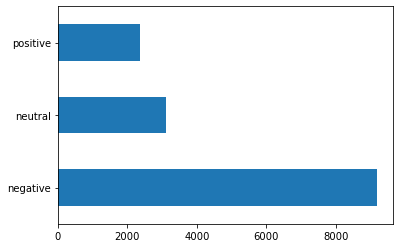

In [66]:
sentiment_count.plot(kind = 'barh')

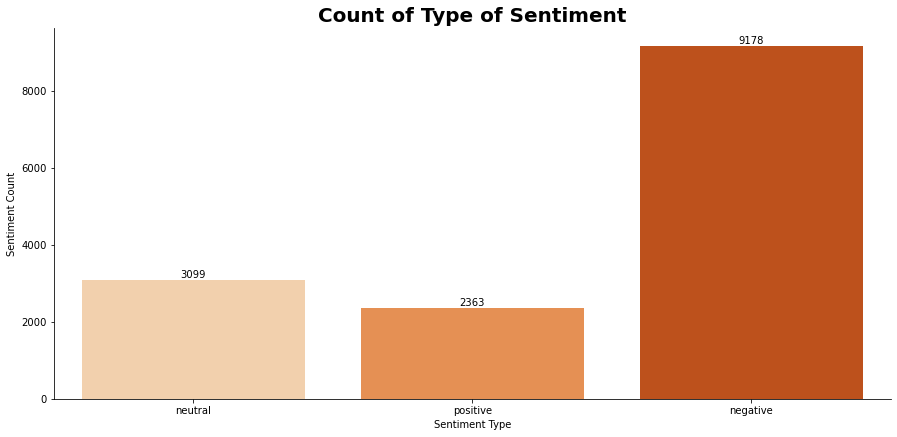

In [61]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1).set_title("Count of Type of Sentiment", fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax = sns.countplot(df['airline_sentiment'],palette="Oranges")
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
ax.bar_label(ax.containers[0])
sns.despine()

## How many different airlines are present in the dataset?

In [6]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

([<matplotlib.patches.Wedge at 0x1f2420c47f0>,
 [Text(0.7503132816269462, 0.8043817373698904, 'Virgin America'),
  Text(-0.7041085836202399, 0.8451219453264125, 'United'),
  Text(-1.0366690370873182, -0.3678550088614437, 'Southwest'),
  Text(-0.12999433663974685, -1.0922918439874905, 'Delta'),
  Text(0.8461786665248315, -0.7028382917273774, 'US Airways'),
  Text(1.093572858985168, -0.11873669226909424, 'American')])

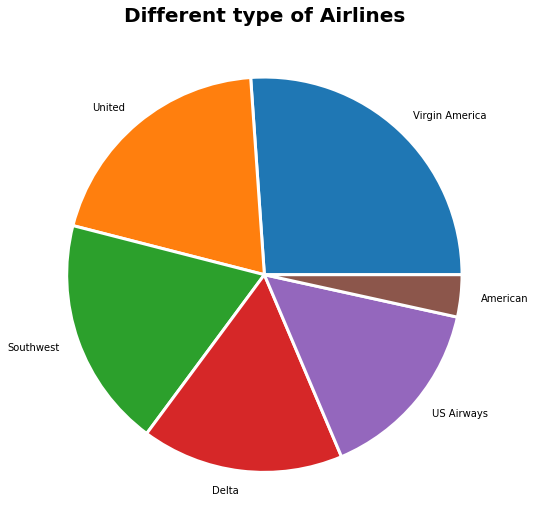

In [23]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1).set_title("Different type of Airlines", fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.pie(df['airline'].value_counts(), labels = df['airline'].unique(),wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

There are total of 6 different airlines present in the given dataset.

## Could you generate the no. of sentiments of each airline from the data?

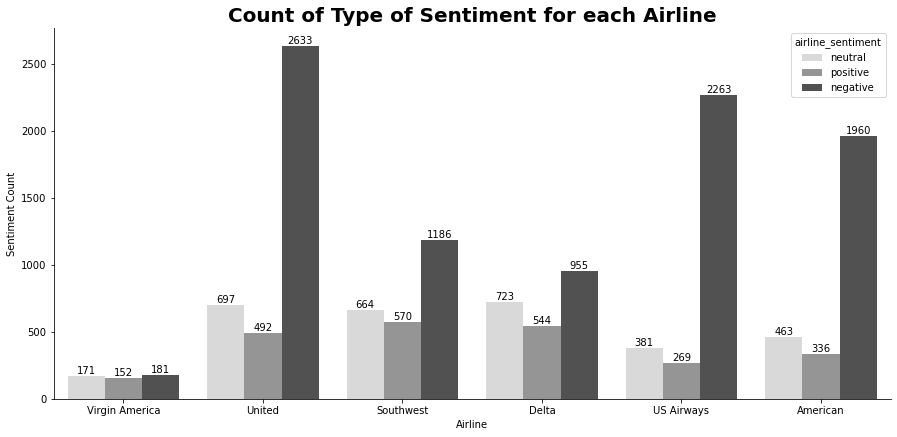

In [67]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1).set_title("Count of Type of Sentiment for each Airline", fontdict= { 'fontsize': 20, 'fontweight':'bold'})
ax = sns.countplot(df['airline'],hue =df.airline_sentiment,palette="Greys")
plt.xlabel('Airline')
plt.ylabel('Sentiment Count')
for i in ax.containers:
    ax.bar_label(i,)
sns.despine()

## Which airline has the maximum negative sentiments?

In [36]:
count_of_negative_sentiment = df.loc[df['airline_sentiment'] == 'negative']

In [39]:
max_negative_sentiment = count_of_negative_sentiment['airline'].value_counts()
max_negative_sentiment

United            2633
US Airways        2263
American          1960
Southwest         1186
Delta              955
Virgin America     181
Name: airline, dtype: int64

<BarContainer object of 6 artists>

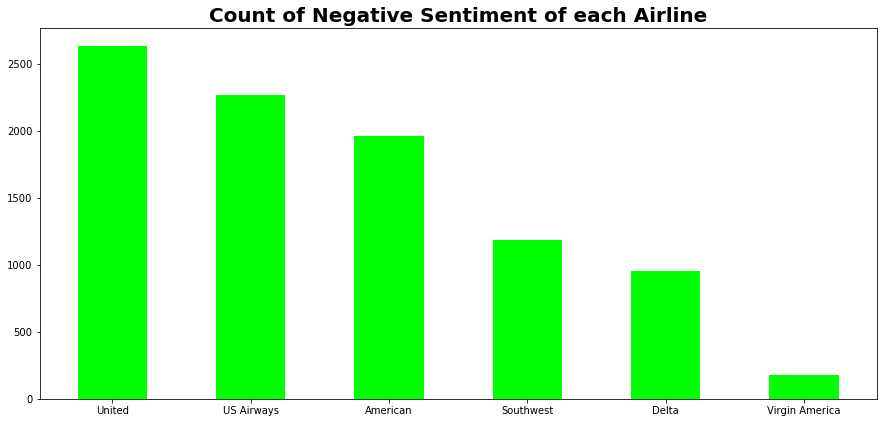

In [59]:
airline_names = ['United','US Airways','American','Southwest','Delta','Virgin America']
plt.figure(figsize=(15,15))
plt.subplot(2,1,1).set_title("Count of Negative Sentiment of each Airline", fontdict= { 'fontsize': 20, 'fontweight':'bold'})
plt.bar(airline_names,max_negative_sentiment,color ='lime',width = 0.5)

United airlines has the maximum negative sentiments.

## What is the most common negative feedback given?

In [11]:
count_negative_sentiment = df.loc[df['airline_sentiment'] == 'negative']

In [12]:
count_negative_sentiment['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

Text(0, 0.5, 'Reason Count')

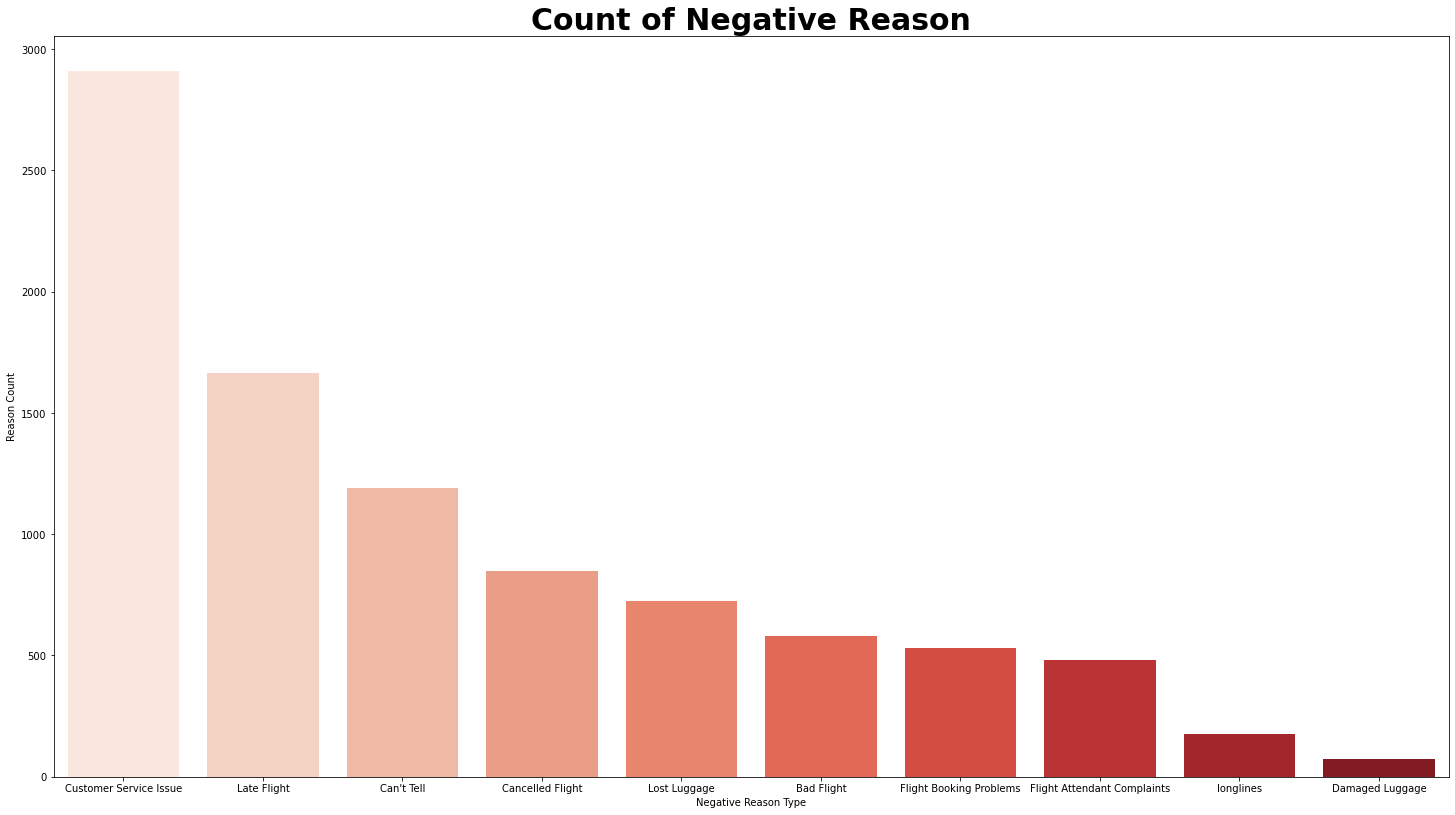

In [65]:
plt.figure(figsize=(25,30))
plt.subplot(2,1,1).set_title("Count of Negative Reason", fontdict= { 'fontsize': 30, 'fontweight':'bold'})
sns.countplot(x ='negativereason',data = df,palette = "Reds",order = df['negativereason'].value_counts().index)
plt.xlabel('Negative Reason Type')
plt.ylabel('Reason Count')

Customer Service Issue is the most common negative feedback given.

## Is there a specific day where a lot of negative feedbacks were given?

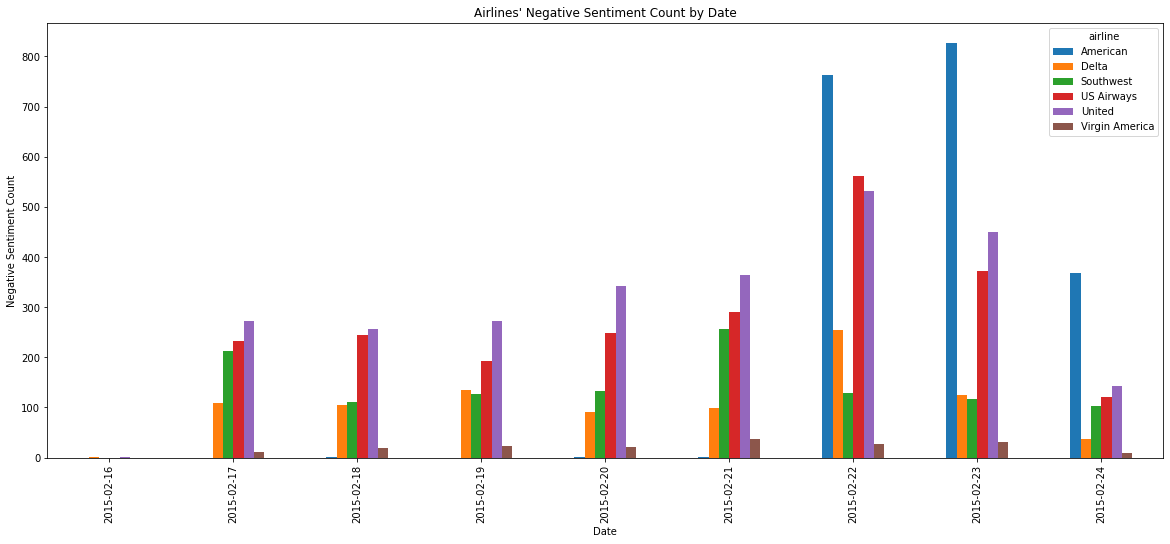

In [13]:
timezone_count = df['user_timezone'].value_counts()
tweet = df.groupby(['airline','airline_sentiment'])['user_timezone'].value_counts()

df['tweet_created']=pd.to_datetime(df['tweet_created'])
df['tweet_created'] = df['tweet_created'].dt.date
day = df.groupby(['tweet_created','airline'])['airline_sentiment'].value_counts(sort=True)
date = day.loc(axis=0)[:,:,'negative']
date.groupby(['tweet_created','airline']).sum().unstack().plot(kind='bar',figsize=(20,8))
plt.xlabel('Date')
plt.ylabel('Negative Sentiment Count')
plt.title("Airlines' Negative Sentiment Count by Date")
plt.show()

On 22-Feb-2015 and 23-Feb-2015, there is lot of negative feedbacks given.

## From your analysis, which airline do you feel is doing the best?

In [14]:
negative_count = count_of_negative_sentiment['airline'].value_counts()

total_count = df['airline'].value_counts()

result = []
for i,j in zip(negative_count,total_count):
    result = (i/j) * 100
    print(round(result,2),'%')


68.89 %
77.69 %
71.04 %
49.01 %
42.98 %
35.91 %


In [15]:
a = df.airline_sentiment
b = df.airline
data = {'Airline':b, 'Airline Sentiment':a}

In [16]:
df1 = pd.DataFrame(data)
df1

,Airline,Airline Sentiment
0,Virgin America,neutral
1,Virgin America,positive
2,Virgin America,neutral
3,Virgin America,negative
4,Virgin America,negative
...,...,...
14635,American,positive
14636,American,negative
14637,American,neutral
14638,American,negative


In [17]:
cross_tab_prop = pd.crosstab(index=df1['Airline'],
                             columns=df1['Airline Sentiment'],
                             normalize="index")
cross_tab_prop

Airline Sentiment,negative,neutral,positive
Airline,,,
American,0.710402,0.167814,0.121783
Delta,0.429793,0.325383,0.244824
Southwest,0.490083,0.274380,0.235537
US Airways,0.776862,0.130793,0.092345
United,0.688906,0.182365,0.128728
Virgin America,0.359127,0.339286,0.301587


In [18]:
cross_tab = pd.crosstab(index=df1['Airline'],
                             columns=df1['Airline Sentiment'])
cross_tab

Airline Sentiment,negative,neutral,positive
Airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


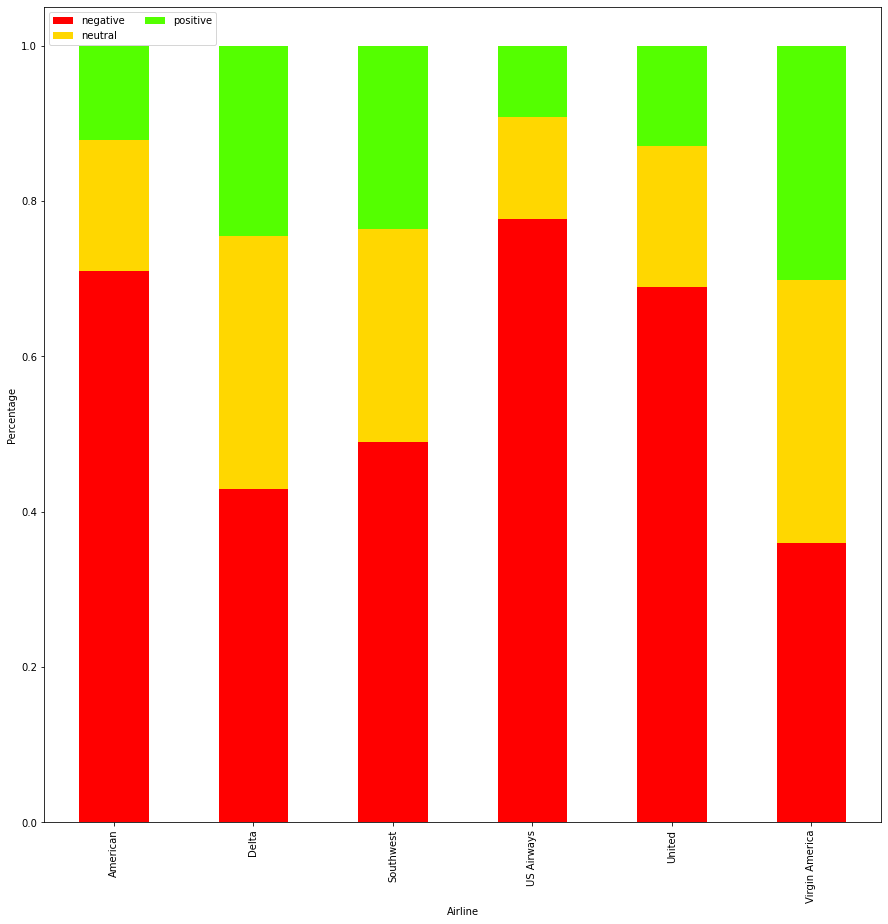

In [19]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True,                     
                    colormap='prism', 
                    figsize=(15,15))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Airline")
plt.ylabel("Percentage")

plt.show()

Virgin America is doing the best as it has the lowest percentage of negative reviews as compared to others.